In [72]:
import numpy as np
import pandas as pd
import os
from datetime import datetime,timedelta
import math
import matplotlib.pyplot as plt
import seaborn  



In [73]:
from_str='2022-01-01'
to_str='2022-12-31'
feq ='Q'  

In [74]:
data_file='data/3CoreETFWorld.csv'
title='3CoreETFWorld'
report_path=f'report'


print(report_path)

report


In [75]:
# build period datafrme
period_index=pd.date_range(start=from_str,end=to_str, freq=feq)
print(period_index)

DatetimeIndex(['2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'], dtype='datetime64[ns]', freq='Q-DEC')


In [76]:
fundPerfByPeriod_df=pd.DataFrame(data=list(period_index),columns=['End_Date'])
fundPerfByPeriod_df['Start_Date']=np.nan
fundPerfByPeriod_df=fundPerfByPeriod_df[['Start_Date','End_Date']]
fundPerfByPeriod_df

,Start_Date,End_Date
0,NaN,2022-03-31
1,NaN,2022-06-30
2,NaN,2022-09-30
3,NaN,2022-12-31


In [77]:
print(f"Create the first date of each {feq} by iteration")
for index,row in fundPerfByPeriod_df.iterrows():
    if index==0:
       fundPerfByPeriod_df.iloc[0,0]=datetime.strptime(from_str,'%Y-%m-%d')
    else:
        # get End_Date(last day of Year, Quater,Month) of previouse row 
        prev_end_date= fundPerfByPeriod_df.iloc[index-1,1] 
        start_date=prev_end_date + timedelta(days = 1) # 
        fundPerfByPeriod_df.iloc[index,0]=start_date 
    # print(fundPerfByPeriod_df) 
    # print(f"=================index={index}=================")
print(fundPerfByPeriod_df.info())
fundPerfByPeriod_df

Create the first date of each Q by iteration
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  4 non-null      object        
 1   End_Date    4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 192.0+ bytes
None


,Start_Date,End_Date
0,2022-01-01 00:00:00,2022-03-31
1,2022-04-01 00:00:00,2022-06-30
2,2022-07-01 00:00:00,2022-09-30
3,2022-10-01 00:00:00,2022-12-31


In [78]:
fundPerfByPeriod_df['Start_Date']=pd.to_datetime(fundPerfByPeriod_df['Start_Date'],format='%Y-%m-%d %H:%M:%S')  

fundPerfByPeriod_df['Period']= fundPerfByPeriod_df.apply( lambda item:f"{item['Start_Date'].strftime('%d')}{item['Start_Date'].strftime('%b')}{item['Start_Date'].strftime('%y')}-{item['End_Date'].strftime('%d')}{item['End_Date'].strftime('%b')}{item['End_Date'].strftime('%y')}"  ,axis=1  )
fundPerfByPeriod_df.info()
fundPerfByPeriod_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  4 non-null      datetime64[ns]
 1   End_Date    4 non-null      datetime64[ns]
 2   Period      4 non-null      object        
dtypes: datetime64[ns](2), object(1)
memory usage: 224.0+ bytes


,Start_Date,End_Date,Period
0,2022-01-01,2022-03-31,01Jan22-31Mar22
1,2022-04-01,2022-06-30,01Apr22-30Jun22
2,2022-07-01,2022-09-30,01Jul22-30Sep22
3,2022-10-01,2022-12-31,01Oct22-31Dec22


In [79]:
df = pd.read_csv(data_file,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
df.index.set_names('date',inplace=True)
df.rename(columns={'Ticker':'symbol','close':'price'},inplace=True)
df=df[['symbol','price']]
df.info()
print(df.tail(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1602 entries, 2021-01-04 to 2023-02-15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  1602 non-null   object 
 1   price   1602 non-null   float64
dtypes: float64(1), object(1)
memory usage: 37.5+ KB
           symbol   price
date                     
2023-02-09    QQQ  301.68
2023-02-10    QQQ  299.70
2023-02-13    QQQ  304.50
2023-02-14    QQQ  306.75
2023-02-15    QQQ  309.10


In [80]:
list_fund_name=df['symbol'].unique().tolist()  
print(list_fund_name)

['ACWI', 'SPY', 'QQQ']


In [81]:
dictPriceOfFund={}
for name in list_fund_name:
  fund_df=df.query('symbol==@name')
  fund_df=fund_df.loc[from_str:to_str,['price']]
  fund_df.sort_index(inplace=True)
  if len(fund_df)  >0:
      dictPriceOfFund[name]=fund_df  
      print(f"======={name} : {len(fund_df)}==========")  
      print(fund_df.tail(3))    
        

=======ACWI : 251==========
            price
date             
2022-12-28  83.93
2022-12-29  85.39
2022-12-30  84.88
=======SPY : 251==========
             price
date              
2022-12-28  376.66
2022-12-29  383.44
2022-12-30  382.43
=======QQQ : 251==========
             price
date              
2022-12-28  260.10
2022-12-29  266.44
2022-12-30  266.28


In [82]:
report_path=os.path.join (report_path, f"{title}-{feq}-{from_str}_{to_str}")
if not os.path.exists(report_path):
 os.makedirs(report_path)



In [83]:
def create_pct_acc_df(df_temp,start_pct,end_pct):
    df_temp=fund_df.loc[start_pct:end_pct,:]
    df_temp['return_pct']=df_temp['price'].pct_change()  
    df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
    df_temp=df_temp.drop(columns=['price','return_pct'])
    df_temp.fillna(1,inplace=True)   
    return df_temp
    

plot chart line to compare return performace on each period


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

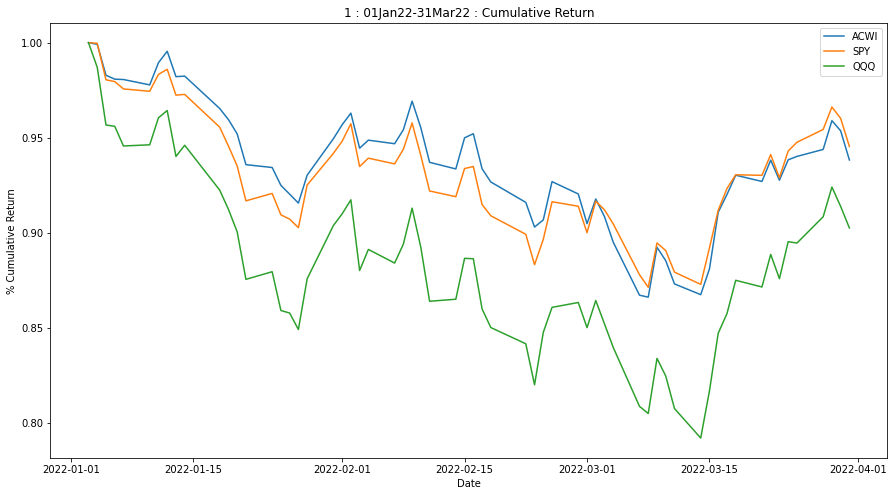

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

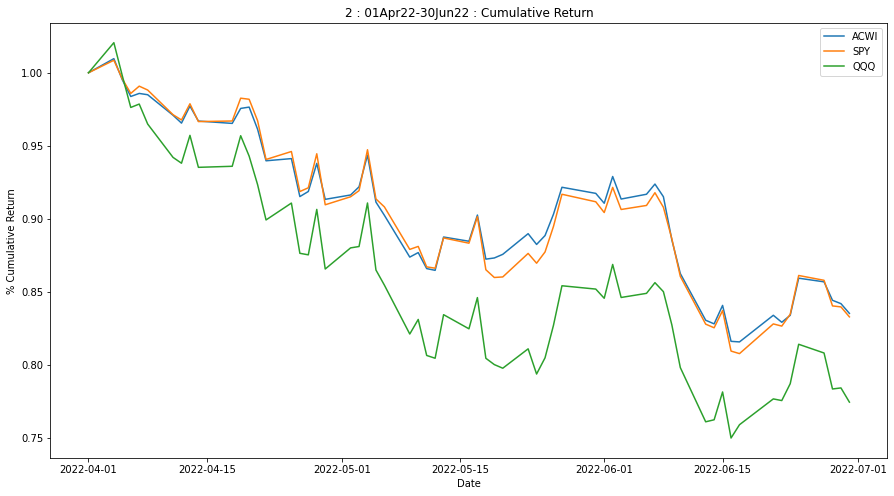

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

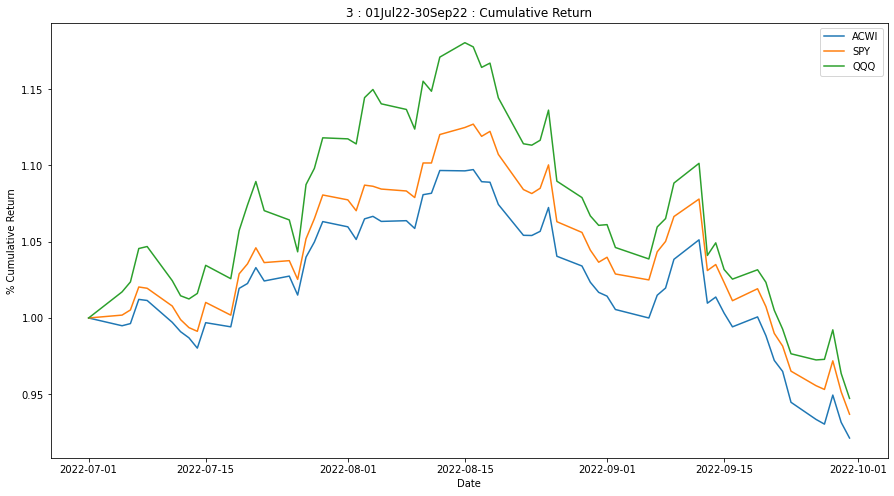

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

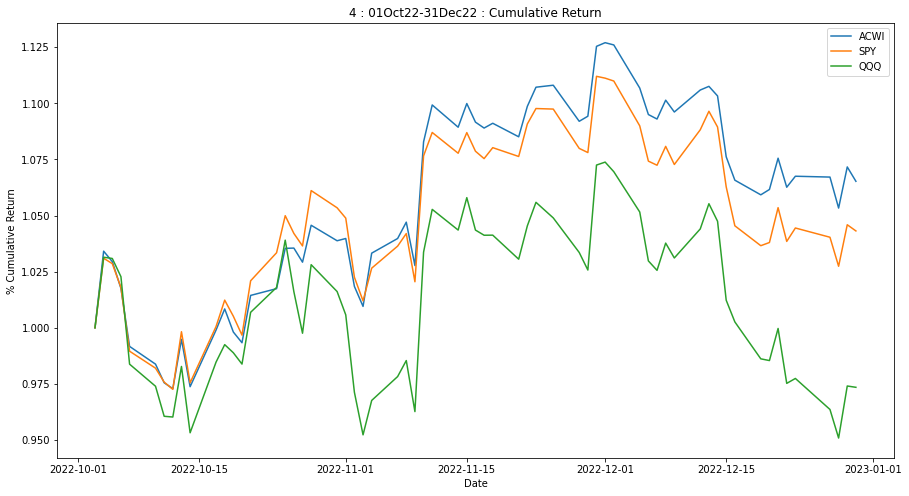

In [85]:
print("plot chart line to compare return performace on each period")
count_pic=0
for index,item in fundPerfByPeriod_df.iterrows():
    start_date=item['Start_Date']
    end_date=item['End_Date'] 
    fig = plt.figure(figsize = (15, 8))
    for fund_name,fund_df in dictPriceOfFund.items():
        df=create_pct_acc_df(fund_df,start_date,end_date) 
        plt.plot(df.index,df['cum_return_pct'],label =fund_name)  
    plt.legend()    
    plt.xlabel("Date")
    plt.ylabel("% Cumulative Return")
    
    count_pic=count_pic+1
    plt.title(f"{count_pic} : {item['Period']} : Cumulative Return")
    
    plt.savefig(f'{report_path}\\{count_pic}-{item["Period"]}.png')
    plt.show() 
    


In [86]:
fundPerfByPeriod_df

,Start_Date,End_Date,Period
0,2022-01-01,2022-03-31,01Jan22-31Mar22
1,2022-04-01,2022-06-30,01Apr22-30Jun22
2,2022-07-01,2022-09-30,01Jul22-30Sep22
3,2022-10-01,2022-12-31,01Oct22-31Dec22


In [87]:
def cal_percent_return(item,fundTemp_df):
    start_date=item['Start_Date']
    end_date=item['End_Date']
    tempDF=fundTemp_df.loc[start_date:end_date,:]
    if tempDF.empty==False:
      start_price=float(tempDF.iloc[0, 0])
      end_price=float(tempDF.iloc[len(tempDF)-1, 0])   
      invest_return=(  end_price- start_price)/ start_price*100
      invest_return=round(invest_return,2)  
                        
      print(f"{start_date.strftime('%d%b%y')} to {end_date.strftime('%d%b%y')}: ROC = ({end_price}-{start_price})/{start_price}x100= {invest_return} %")    
      return invest_return                  
    else:
                        
      return 0                  
        
    
    

In [88]:
for name,data in dictPriceOfFund.items():
  print(f"======================{name}======================")  
  fundPerfByPeriod_df[name]=fundPerfByPeriod_df.apply(cal_percent_return,axis=1,args=(data,))

fundPerfByPeriod_df["_AVG_"]=fundPerfByPeriod_df[list_fund_name].mean(axis=1,skipna=True).round(2)

fundPerfByPeriod_df.set_index('Period',inplace=True)   


======================ACWI======================
01Jan22 to 31Mar22: ROC = (99.78-106.34)/106.34x100= -6.17 %
01Apr22 to 30Jun22: ROC = (83.89-100.43)/100.43x100= -16.47 %
01Jul22 to 30Sep22: ROC = (77.83-84.48)/84.48x100= -7.87 %
01Oct22 to 31Dec22: ROC = (84.88-79.68)/79.68x100= 6.53 %
======================SPY======================
01Jan22 to 31Mar22: ROC = (451.64-477.71)/477.71x100= -5.46 %
01Apr22 to 30Jun22: ROC = (377.25-452.92)/452.92x100= -16.71 %
01Jul22 to 30Sep22: ROC = (357.18-381.24)/381.24x100= -6.31 %
01Oct22 to 31Dec22: ROC = (382.43-366.61)/366.61x100= 4.32 %
======================QQQ======================
01Jan22 to 31Mar22: ROC = (362.54-401.68)/401.68x100= -9.74 %
01Apr22 to 30Jun22: ROC = (280.28-361.85)/361.85x100= -22.54 %
01Jul22 to 30Sep22: ROC = (267.26-282.13)/282.13x100= -5.27 %
01Oct22 to 31Dec22: ROC = (266.28-273.53)/273.53x100= -2.65 %


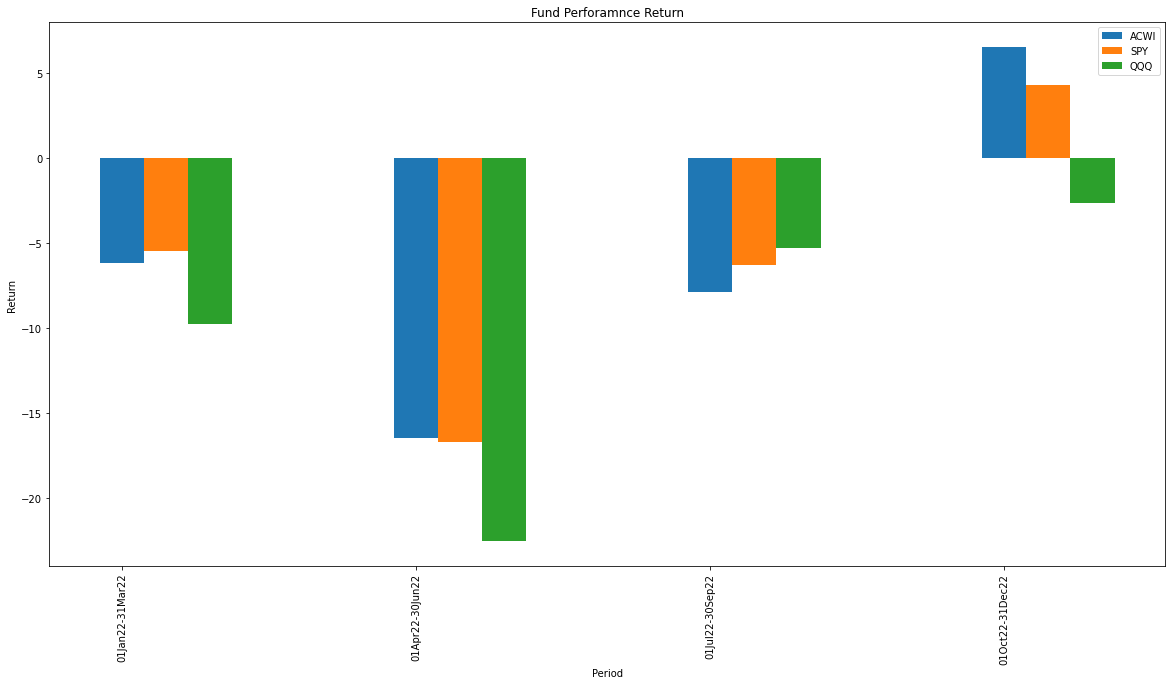

In [89]:
fundReturn_df=fundPerfByPeriod_df[list_fund_name]
fig = plt.figure(figsize = (20, 10))
X_axis = np.arange(len(fundReturn_df)) # length of column to fix axis=y
X_point=0.00
X_width=0.15

for colName  in fundReturn_df.columns:
    
    plt.bar(X_axis+X_point,fundReturn_df[colName],X_width, label =colName)
    X_point+=X_width

# length of column to fix axis=y
plt.xticks(X_axis, fundReturn_df.index,rotation='vertical')
plt.xlabel("Period")
plt.ylabel("Return")
plt.title(f"Fund Perforamnce Return")
plt.legend()

plt.savefig(f'{report_path}\\Return_{from_str}_{to_str}.png')

plt.show()



In [90]:
fundPerfByPeriod_df

,Start_Date,End_Date,ACWI,SPY,QQQ,_AVG_
Period,,,,,,
01Jan22-31Mar22,2022-01-01,2022-03-31,-6.17,-5.46,-9.74,-7.12
01Apr22-30Jun22,2022-04-01,2022-06-30,-16.47,-16.71,-22.54,-18.57
01Jul22-30Sep22,2022-07-01,2022-09-30,-7.87,-6.31,-5.27,-6.48
01Oct22-31Dec22,2022-10-01,2022-12-31,6.53,4.32,-2.65,2.73


In [91]:
def find_rank(fund_temp,list_fundX,FinalRank_ColName):
     fundPerfRank=fund_temp[list_fundX]
     fundPerfRank=fundPerfRank.T   
     for colNameToRank in fundPerfRank.columns:
      fundPerfRank[colNameToRank]=fundPerfRank[colNameToRank].rank(method='max')   
     return fundPerfRank

rankCol_name_all='AllRank'
fundRank_df=find_rank(fundPerfByPeriod_df[list_fund_name],list_fund_name,rankCol_name_all)
fundRank_df=fundRank_df.T 
fundRank_df

,ACWI,SPY,QQQ
Period,,,
01Jan22-31Mar22,2.0,3.0,1.0
01Apr22-30Jun22,3.0,2.0,1.0
01Jul22-30Sep22,1.0,2.0,3.0
01Oct22-31Dec22,3.0,2.0,1.0


In [92]:
dfSummary=pd.concat([\
                     fundPerfByPeriod_df[list_fund_name].sum().to_frame(name='total_return'),\
                     fundRank_df.sum().to_frame(name='sum_rank_score'),\
                    ],axis=1)
dfSummary.fillna(value=0,inplace=True)
dfSummary

,total_return,sum_rank_score
ACWI,-23.98,9.0
SPY,-24.16,9.0
QQQ,-40.20,6.0


In [93]:
dfFinalScore=pd.DataFrame(index=dfSummary.index)
dfFinalScore

""
ACWI
SPY
QQQ


In [94]:
for colNameToRank in dfSummary.columns:
  dfFinalScore[f"{colNameToRank}_rank"]=dfSummary[colNameToRank].rank(method='max')  
dfFinalScore=pd.concat([dfFinalScore,dfFinalScore.sum(axis=1).to_frame("TotalScore")],axis=1)
dfFinalScore

,total_return_rank,sum_rank_score_rank,TotalScore
ACWI,3.0,3.0,6.0
SPY,2.0,3.0,5.0
QQQ,1.0,1.0,2.0


In [95]:
dfSummary=pd.merge(left=dfSummary,right=dfFinalScore,left_index=True,right_index=True)
dfSummary.sort_values(by='TotalScore',ascending=False,inplace=True)
dfSummary.sort_index(axis=1,ascending=False,inplace=True)
dfSummary



,total_return_rank,total_return,sum_rank_score_rank,sum_rank_score,TotalScore
ACWI,3.0,-23.98,3.0,9.0,6.0
SPY,2.0,-24.16,3.0,9.0,5.0
QQQ,1.0,-40.20,1.0,6.0,2.0


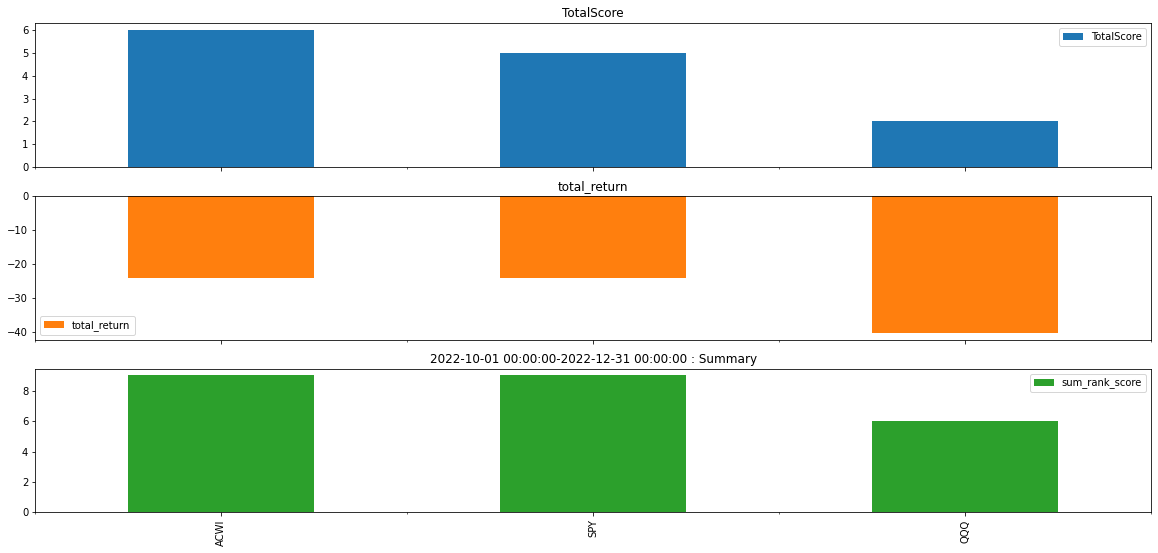

In [96]:
colToPlots=['TotalScore','total_return','sum_rank_score' ]

dfSummary[colToPlots].plot(kind='bar',layout=(len(colToPlots),1),
                      subplots=True,figsize=(20, 3*len(colToPlots)))
plt.title(f"{start_date}-{end_date} : Summary")
plt.savefig(f'{report_path}\\{from_str}-{to_str}-summary.png')
   
plt.show()

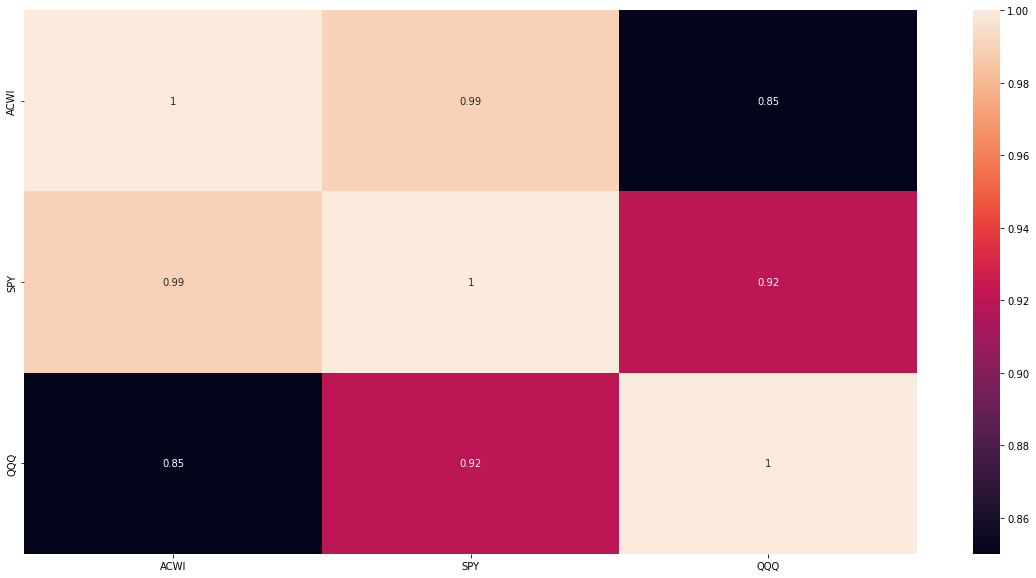

,ACWI,SPY,QQQ
ACWI,1.00,0.99,0.85
SPY,0.99,1.00,0.92
QQQ,0.85,0.92,1.00


In [97]:


corr_df = fundReturn_df.corr ()  
corr_df = corr_df .round(2)

fig = plt.figure(figsize = (20, 10))
heatmap = seaborn. heatmap(corr_df, annot = True)
plt.savefig(f'{report_path}\\Corr_{from_str}_{to_str}.png')
plt. show ()  

corr_df


In [98]:
report_file = os.path .join(report_path, "Report.xlsx")
writer=pd.ExcelWriter(report_file,engine='xlsxwriter') 

fundPerfByPeriod_df.to_excel(writer, sheet_name="Return")
fundRank_df.to_excel(writer, sheet_name="RANK")
dfSummary.to_excel(writer, sheet_name="Summary")
corr_df.to_excel(writer, sheet_name="Des",index=True)

writer.save()




C:\Users\pongthsa\AppData\Local\Temp\ipykernel_24596\3854984435.py:9: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()
